# Deep Learning
## Project_1

### - Task #1 & Task #2

In [1]:
'''
DNN to classify MNIST handwritten digits
'''

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [2]:
"""
Task #1 & Task #2
"""

# Parameters
learning_rate = 0.001
n_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder(tf.float32, [batch_size, n_input])
Y = tf.placeholder(tf.float32, [batch_size, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(X, weights, biases)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))

#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)


# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training 
    for i in range(n_epochs):
        total_loss = 0.
        n_batches = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for j in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, l = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            # Compute average loss
            total_loss += l
        # Display logs per epoch step
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

    print("Optimization Finished!")


    correct_preds = tf.equal(tf.argmax(pred, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run(accuracy, feed_dict={X: X_batch, Y:Y_batch}) 
        total_correct_preds += accuracy_batch   
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Average loss epoch 0: 168.3850292119113
Average loss epoch 1: 33.46105378627777
Average loss epoch 2: 21.040984600240535
Average loss epoch 3: 14.615540624490961
Average loss epoch 4: 10.757293025444854
Average loss epoch 5: 8.032111677757719
Average loss epoch 6: 6.111178395861966
Average loss epoch 7: 4.594843542595867
Average loss epoch 8: 3.5686115723803864
Average loss epoch 9: 2.8478462347794475
Average loss epoch 10: 2.2000356414038875
Average loss epoch 11: 1.647046978118015
Average loss epoch 12: 1.3968338611474465
Average loss epoch 13: 1.068735796603706
Average loss epoch 14: 0.9721019016755769
Average loss epoch 15: 0.6981170082559724
Average loss epoch 16: 0.6100249284353196
Average loss epoch 17: 0.545327482841878

### - Task #3

In [3]:
"""
Task #3
"""

import pandas as pd
import numpy as np
import time

task3_data_dict = {"Features": np.array([256, 128, 64]),
                   "Accuracy": np.zeros(3),
                   "Num of Hidden Layers": np.zeros(3),
                   "Num of Learning Params": np.zeros(3),
                   "Avg Loss (Last Epoch)": np.zeros(3),
                   "Elapsed Time": np.zeros(3)}

task3_df = pd.DataFrame.from_dict(task3_data_dict)
task3_df.index = task3_df["Features"]
del task3_df["Features"]

In [4]:
"""
Task #3 - 1 : DNN with two hidden layers, each layer has 256 units (as in the given code)
"""

# Pandas Params
row_index = 256

# Parameters
learning_rate = 0.001
n_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

task3_df.loc[row_index, "Num of Hidden Layers"] = 2
task3_df.loc[row_index, "Num of Learning Params"] = (n_hidden_1 + 1) + (n_hidden_2 + 1)  # 514

# tf Graph input
X = tf.placeholder(tf.float32, [batch_size, n_input])
Y = tf.placeholder(tf.float32, [batch_size, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(X, weights, biases)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))

#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)


# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    start = time.time()
    # Training 
    for i in range(n_epochs):
        total_loss = 0.
        n_batches = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for j in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, l = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            # Compute average loss
            total_loss += l
        # Display logs per epoch step
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        
        if (j == (n_batches - 1)):
            task3_df.loc[row_index, "Avg Loss (Last Epoch)"] = total_loss / n_batches
            

    end = time.time()
    print("Optimization Finished!")

    task3_df.loc[row_index, "Elapsed Time"] = end - start

    correct_preds = tf.equal(tf.argmax(pred, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run(accuracy, feed_dict={X: X_batch, Y:Y_batch}) 
        total_correct_preds += accuracy_batch   
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
    task3_df.loc[row_index, "Accuracy"] = total_correct_preds / mnist.test.num_examples

Average loss epoch 0: 150.2354018315402
Average loss epoch 1: 34.373104598738934
Average loss epoch 2: 21.107679878960955
Average loss epoch 3: 14.4672446757555
Average loss epoch 4: 10.437434271330183
Average loss epoch 5: 7.768763152445886
Average loss epoch 6: 5.7996919524475485
Average loss epoch 7: 4.447629981860639
Average loss epoch 8: 3.405731862537151
Average loss epoch 9: 2.637055498776012
Average loss epoch 10: 2.0290278591944397
Average loss epoch 11: 1.5967412873049553
Average loss epoch 12: 1.2134866588001714
Average loss epoch 13: 0.9021374697865949
Average loss epoch 14: 0.794327641993073
Average loss epoch 15: 0.6079673807008411
Average loss epoch 16: 0.48518941233932805
Average loss epoch 17: 0.4086556032073026
Average loss epoch 18: 0.3734318659139086
Average loss epoch 19: 0.3137534890368079
Optimization Finished!
Accuracy 0.9448


In [5]:
"""
Task #3 - 2 : DNN with three hidden layers, each layer has 128 units
"""

# Pandas Params
row_index = 128

# Parameters
learning_rate = 0.001
n_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 128 # 1st layer number of features
n_hidden_2 = 128 # 2nd layer number of features
n_hidden_3 = 128 # 3rd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

task3_df.loc[row_index, "Num of Hidden Layers"] = 3
task3_df.loc[row_index, "Num of Learning Params"] = (n_hidden_1 + 1) + (n_hidden_2 + 1) + (n_hidden_3 + 1)  # 387

# tf Graph input
X = tf.placeholder(tf.float32, [batch_size, n_input])
Y = tf.placeholder(tf.float32, [batch_size, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(X, weights, biases)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))

#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)


# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    start = time.time()
    # Training 
    for i in range(n_epochs):
        total_loss = 0.
        n_batches = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for j in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, l = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            # Compute average loss
            total_loss += l
        # Display logs per epoch step
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        
        if (j == (n_batches - 1)):
            task3_df.loc[row_index, "Avg Loss (Last Epoch)"] = total_loss / n_batches
            

    end = time.time()
    print("Optimization Finished!")

    task3_df.loc[row_index, "Elapsed Time"] = end - start

    correct_preds = tf.equal(tf.argmax(pred, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run(accuracy, feed_dict={X: X_batch, Y:Y_batch}) 
        total_correct_preds += accuracy_batch   
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
    task3_df.loc[row_index, "Accuracy"] = total_correct_preds / mnist.test.num_examples

Average loss epoch 0: 679.0628434753418
Average loss epoch 1: 119.2363397286155
Average loss epoch 2: 69.66267197869041
Average loss epoch 3: 47.29920308156447
Average loss epoch 4: 34.544994585297324
Average loss epoch 5: 26.66980153994127
Average loss epoch 6: 20.69554401573937
Average loss epoch 7: 16.906616189333146
Average loss epoch 8: 13.738047696966651
Average loss epoch 9: 11.22899821767694
Average loss epoch 10: 9.378057014156472
Average loss epoch 11: 7.802728737028362
Average loss epoch 12: 6.579349261337718
Average loss epoch 13: 5.547826656102472
Average loss epoch 14: 4.585534736017153
Average loss epoch 15: 3.959014181323207
Average loss epoch 16: 3.4069790860712037
Average loss epoch 17: 2.867893284688423
Average loss epoch 18: 2.4810412897024503
Average loss epoch 19: 2.2029979544820546
Optimization Finished!
Accuracy 0.9247


In [6]:
"""
Task #3 - 3 : DNN with four hidden layers, each layer has 64 units
"""

# Pandas Params
row_index = 64

# Parameters
learning_rate = 0.001
n_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 64 # 1st layer number of features
n_hidden_2 = 64 # 2nd layer number of features
n_hidden_3 = 64 # 3rd layer number of features
n_hidden_4 = 64 # 4th layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

task3_df.loc[row_index, "Num of Hidden Layers"] = 4
task3_df.loc[row_index, "Num of Learning Params"] = (n_hidden_1 + 1) + (n_hidden_2 + 1) + (n_hidden_3 + 1) + (n_hidden_4 + 1)  # 260

# tf Graph input
X = tf.placeholder(tf.float32, [batch_size, n_input])
Y = tf.placeholder(tf.float32, [batch_size, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(X, weights, biases)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))

#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)


# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    start = time.time()
    # Training 
    for i in range(n_epochs):
        total_loss = 0.
        n_batches = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for j in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, l = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            # Compute average loss
            total_loss += l
        # Display logs per epoch step
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        
        if (j == (n_batches - 1)):
            task3_df.loc[row_index, "Avg Loss (Last Epoch)"] = total_loss / n_batches
            

    end = time.time()
    print("Optimization Finished!")

    task3_df.loc[row_index, "Elapsed Time"] = end - start

    correct_preds = tf.equal(tf.argmax(pred, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run(accuracy, feed_dict={X: X_batch, Y:Y_batch}) 
        total_correct_preds += accuracy_batch   
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
    task3_df.loc[row_index, "Accuracy"] = total_correct_preds / mnist.test.num_examples

Average loss epoch 0: 1601.9591391546076
Average loss epoch 1: 211.5347298223322
Average loss epoch 2: 116.53942475752397
Average loss epoch 3: 76.86575946287675
Average loss epoch 4: 55.95346473520452
Average loss epoch 5: 42.815124504782936
Average loss epoch 6: 33.43493665088307
Average loss epoch 7: 27.074209557446565
Average loss epoch 8: 22.223648112687197
Average loss epoch 9: 18.761376165693456
Average loss epoch 10: 15.988538664471019
Average loss epoch 11: 13.724543222947554
Average loss epoch 12: 11.935046319439108
Average loss epoch 13: 10.583587864258073
Average loss epoch 14: 9.378487104793207
Average loss epoch 15: 8.50182960300283
Average loss epoch 16: 7.646449229229581
Average loss epoch 17: 6.9291045269099145
Average loss epoch 18: 6.321518710161961
Average loss epoch 19: 5.7993867932872805
Optimization Finished!
Accuracy 0.8993


In [7]:
task3_df

,Accuracy,Avg Loss (Last Epoch),Elapsed Time,Num of Hidden Layers,Num of Learning Params
Features,,,,,
256,0.9448,0.313753,12.678389,2.0,514.0
128,0.9247,2.202998,13.659215,3.0,387.0
64,0.8993,5.799387,15.040273,4.0,260.0


 We can see that if hidden layers deepens, and the number of features in each layer decreases, the accuracy decreases. In this condition, the accuracy is proportional to the number of features and inversely proportional to the depth of layers. In addition, learning time is also increasing.

 Let's think about the reason. If increasing the number of features, it could find well characteristics that are able to distinguish data. That is, it is natural that the accuracy increases as the number of features increases.

 Then, what is the correlation with the depth of the layer? The current model uses ReLU activation function in hidden layers. If the trained value is derived as negative number, ReLU activation function will replace the value with 0. That is, if there is a node that is derived to negative number previously, there exists a problem that the node will not be trained. So, in the situation that training with a simple data set like MNIST, if layers get deeper it will not train well. Therefore, in this situation, the accuracy is not proportional to the depth of layers.

### - Task #4

 In Task #3, we found out that deeper the layers, it will not train well. Then to get the best result of training, we should set layers to shallow. So in this situation, fix the number of layers to 2.
 The number of models that are made for getting results is 3, and hyperparameter set is as follow.

__[ Models ]__ 

Model_1:
- hidden_1_size: 512
- hidden_2_size: 256   
  
Model_2: 
- hidden_1_size: 784,  
- hidden_2_size: 512  

  
Model_3:
- hidden_1_size: 1024,  
- hidden_2_size: 784  

__[ Parameters ]__  
- n_epochs_list = [10, 20, 40, 80, 160, 320]  
- batch_size_list = [100, 200]  
- learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]  
- display_step = 1  

In [8]:
"""
Task #4
"""

import json

In [9]:
"""
Models
"""
all_model_dict = dict()

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# 784 -> 512 -> 256 -> 10
class MyModel_1(object):
    
    def __init__(self, sess, learning_rate, batch_size):
        self.sess = sess
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.hidden_1_size = 512
        self.hidden_2_size = 256
        
        self.X = tf.placeholder(tf.float32, shape=[self.batch_size, n_input])
        self.Y = tf.placeholder(tf.float32, shape=[self.batch_size, n_classes])
        
        self.pred = None
        self.loss = None
        self.optimizer = None
        
        self.correct_preds = None
        self.accuracy = None
        
    def build_model(self):
        with tf.variable_scope("Layer1"):
            W1 = tf.Variable(tf.random_normal([n_input, self.hidden_1_size]))
            b1 = tf.Variable(tf.random_normal([self.hidden_1_size]))
            layer1 = tf.add(tf.matmul(self.X, W1), b1)
            layer1 = tf.nn.relu(layer1)
            
        with tf.variable_scope("Layer2"):
            W2 = tf.Variable(tf.random_normal([self.hidden_1_size, self.hidden_2_size]))
            b2 = tf.Variable(tf.random_normal([self.hidden_2_size]))
            layer2 = tf.add(tf.matmul(layer1, W2), b2)
            layer2 = tf.nn.relu(layer2)
        
        with tf.variable_scope("Layer3"):
            W3 = tf.Variable(tf.random_normal([self.hidden_2_size, n_classes]))
            b3 = tf.Variable(tf.random_normal([n_classes]))
            layer3 = tf.add(tf.matmul(layer2, W3), b3)
        
        self.pred = layer3
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.pred, labels=self.Y))
        self.optimizer = tf.train.RMSPropOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
        
        self.correct_preds = tf.equal(tf.argmax(self.pred, axis=1), tf.argmax(self.Y, axis=1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_preds, tf.float32))
    
    def train(self, x_batch, y_batch):
        return self.sess.run(fetches=[self.loss, self.optimizer], feed_dict={self.X: x_batch, self.Y: y_batch})
    
    def get_accuracy(self, x_batch, y_batch):
        return self.sess.run(fetches=[self.accuracy], feed_dict={self.X: x_batch, self.Y: y_batch})


# 784 -> 784 -> 512 -> 10
class MyModel_2(object):
    
    def __init__(self, sess, learning_rate, batch_size):
        self.sess = sess
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.hidden_1_size = 784
        self.hidden_2_size = 512 
        
        self.X = tf.placeholder(tf.float32, shape=[self.batch_size, n_input])
        self.Y = tf.placeholder(tf.float32, shape=[self.batch_size, n_classes])
        
        self.pred = None
        self.loss = None
        self.optimizer = None
        
        self.correct_preds = None
        self.accuracy = None
        
    def build_model(self):
        with tf.variable_scope("Layer1"):
            W1 = tf.Variable(tf.random_normal([n_input, self.hidden_1_size]))
            b1 = tf.Variable(tf.random_normal([self.hidden_1_size]))
            layer1 = tf.add(tf.matmul(self.X, W1), b1)
            layer1 = tf.nn.relu(layer1)
            
        with tf.variable_scope("Layer2"):
            W2 = tf.Variable(tf.random_normal([self.hidden_1_size, self.hidden_2_size]))
            b2 = tf.Variable(tf.random_normal([self.hidden_2_size]))
            layer2 = tf.add(tf.matmul(layer1, W2), b2)
            layer2 = tf.nn.relu(layer2)
        
        with tf.variable_scope("Layer3"):
            W3 = tf.Variable(tf.random_normal([self.hidden_2_size, n_classes]))
            b3 = tf.Variable(tf.random_normal([n_classes]))
            layer3 = tf.add(tf.matmul(layer2, W3), b3)
        
        self.pred = layer3
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.pred, labels=self.Y))
        self.optimizer = tf.train.RMSPropOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
        
        self.correct_preds = tf.equal(tf.argmax(self.pred, axis=1), tf.argmax(self.Y, axis=1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_preds, tf.float32))
        
    def train(self, x_batch, y_batch):
        return self.sess.run(fetches=[self.loss, self.optimizer], feed_dict={self.X: x_batch, self.Y: y_batch})
    
    def get_accuracy(self, x_batch, y_batch):
        return self.sess.run(fetches=[self.accuracy], feed_dict={self.X: x_batch, self.Y: y_batch})
    
# 784 -> 1024 -> 784 -> 10
class MyModel_3(object):
    
    def __init__(self, sess, learning_rate, batch_size):
        self.sess = sess
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.hidden_1_size = 1024
        self.hidden_2_size = 784
        
        self.X = tf.placeholder(tf.float32, shape=[self.batch_size, n_input])
        self.Y = tf.placeholder(tf.float32, shape=[self.batch_size, n_classes])
        
        self.pred = None
        self.loss = None
        self.optimizer = None
        
        self.correct_preds = None
        self.accuracy = None
        
    def build_model(self):
        with tf.variable_scope("Layer1"):
            W1 = tf.Variable(tf.random_normal([n_input, self.hidden_1_size]))
            b1 = tf.Variable(tf.random_normal([self.hidden_1_size]))
            layer1 = tf.add(tf.matmul(self.X, W1), b1)
            layer1 = tf.nn.relu(layer1)
            
        with tf.variable_scope("Layer2"):
            W2 = tf.Variable(tf.random_normal([self.hidden_1_size, self.hidden_2_size]))
            b2 = tf.Variable(tf.random_normal([self.hidden_2_size]))
            layer2 = tf.add(tf.matmul(layer1, W2), b2)
            layer2 = tf.nn.relu(layer2)
        
        with tf.variable_scope("Layer3"):
            W3 = tf.Variable(tf.random_normal([self.hidden_2_size, n_classes]))
            b3 = tf.Variable(tf.random_normal([n_classes]))
            layer3 = tf.add(tf.matmul(layer2, W3), b3)
        
        self.pred = layer3
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.pred, labels=self.Y))
        self.optimizer = tf.train.RMSPropOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
        
        self.correct_preds = tf.equal(tf.argmax(self.pred, axis=1), tf.argmax(self.Y, axis=1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_preds, tf.float32))
        
    def train(self, x_batch, y_batch):
        return self.sess.run(fetches=[self.loss, self.optimizer], feed_dict={self.X: x_batch, self.Y: y_batch})
    
    def get_accuracy(self, x_batch, y_batch):
        return self.sess.run(fetches=[self.accuracy], feed_dict={self.X: x_batch, self.Y: y_batch})

 We will analyze the number of cases in all models and in all hyperparameters, and then will find out the highest accuracy. And after, we will also analyze how each parameter affects training and the what is the relationship.

In [11]:
"""
Model 1 (MyModel_1)
"""

# Parameters
n_epochs_list = [10, 20, 40, 80, 160, 320]
batch_size_list = [100, 200]
learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
display_step = 1

# Launch the graph
model_1_dict = dict()

with tf.Session() as sess:
    #Training
    n_epochs_dict = dict()
    for n_epochs in n_epochs_list:
        batch_size_dict = dict()
        
        for batch_size in batch_size_list:
            learning_rate_dict = dict()
            
            for learning_rate in learning_rate_list:
                accuracy_dict = dict()
                
                model = MyModel_1(sess=sess, learning_rate=learning_rate, batch_size=batch_size)
                model.build_model()
                
                # Start
                sess.run(tf.global_variables_initializer())
                
                print("[ n_epochs : {}, batch_size : {}, learning_rate : {} ]".format(n_epochs, batch_size, learning_rate))
                
                for i in range(n_epochs):
                    total_loss = 0.
                    n_batches = int(mnist.train.num_examples/batch_size)
                    # Loop over all batches
                    for j in range(n_batches):
                        X_batch, Y_batch = mnist.train.next_batch(batch_size)
                        # Run optimization op (backprop) and cost op (to get loss value)
                        l, _ = model.train(x_batch=X_batch, y_batch=Y_batch)
                        # Compute average loss
                        total_loss += l
                    # Display logs per epoch step
                    # print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

                # print("Optimization Finished!")

                n_batches = int(mnist.test.num_examples/batch_size)
                total_correct_preds = 0

                for i in range(n_batches):
                    X_batch, Y_batch = mnist.test.next_batch(batch_size)
                    accuracy_batch = model.get_accuracy(x_batch=X_batch, y_batch=Y_batch)
                    total_correct_preds += accuracy_batch[0]

                accuracy = total_correct_preds / n_batches
                print('> Accuracy : {0}'.format(accuracy))
                
                learning_rate_dict[learning_rate] = accuracy
            
            batch_size_dict[batch_size] = learning_rate_dict
            
        n_epochs_dict[n_epochs] = batch_size_dict
    
    model_1_dict["model_1"] = n_epochs_dict

[ n_epochs : 10, batch_size : 100, learning_rate : 0.1 ]
> Accuracy : 0.09579999979585409
[ n_epochs : 10, batch_size : 100, learning_rate : 0.01 ]
> Accuracy : 0.8378999978303909
[ n_epochs : 10, batch_size : 100, learning_rate : 0.001 ]
> Accuracy : 0.9503999990224838
[ n_epochs : 10, batch_size : 100, learning_rate : 0.0001 ]
> Accuracy : 0.8909000033140182
[ n_epochs : 10, batch_size : 200, learning_rate : 0.1 ]
> Accuracy : 0.11350000098347664
[ n_epochs : 10, batch_size : 200, learning_rate : 0.01 ]
> Accuracy : 0.9552999913692475
[ n_epochs : 10, batch_size : 200, learning_rate : 0.001 ]
> Accuracy : 0.944399995803833
[ n_epochs : 10, batch_size : 200, learning_rate : 0.0001 ]
> Accuracy : 0.8801999974250794
[ n_epochs : 20, batch_size : 100, learning_rate : 0.1 ]
> Accuracy : 0.11349999975413085
[ n_epochs : 20, batch_size : 100, learning_rate : 0.01 ]
> Accuracy : 0.8800000023841857
[ n_epochs : 20, batch_size : 100, learning_rate : 0.001 ]
> Accuracy : 0.9554000043869019
[ n_

In [14]:
json_data = json.dumps(model_1_dict)
f = open("model_1_dict.json", "w")
f.write(json_data)
f.close()

model_1_dict

{'model_1': {10: {100: {0.0001: 0.8909000033140182,
    0.001: 0.9503999990224838,
    0.01: 0.8378999978303909,
    0.1: 0.09579999979585409},
   200: {0.0001: 0.8801999974250794,
    0.001: 0.944399995803833,
    0.01: 0.9552999913692475,
    0.1: 0.11350000098347664}},
  20: {100: {0.0001: 0.9155000030994416,
    0.001: 0.9554000043869019,
    0.01: 0.8800000023841857,
    0.1: 0.11349999975413085},
   200: {0.0001: 0.9062000036239624,
    0.001: 0.9500999927520752,
    0.01: 0.9692000091075897,
    0.1: 0.19750000059604644}},
  40: {100: {0.0001: 0.9267000037431717,
    0.001: 0.9627000051736831,
    0.01: 0.8383999997377396,
    0.1: 0.10319999925792217},
   200: {0.0001: 0.9235000026226043,
    0.001: 0.9553999948501587,
    0.01: 0.9767000126838684,
    0.1: 0.10319999977946281}},
  80: {100: {0.0001: 0.931900002360344,
    0.001: 0.9616000056266785,
    0.01: 0.8030999958515167,
    0.1: 0.1010999996215105},
   200: {0.0001: 0.93,
    0.001: 0.9607999980449676,
    0.01: 0.9782

In [15]:
"""
Model 2 (MyModel_2)
"""

# Parameters
n_epochs_list = [10, 20, 40, 80, 160, 320]
batch_size_list = [100, 200]
learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]

# Launch the graph
model_2_dict = dict()

with tf.Session() as sess:
    #Training
    n_epochs_dict = dict()
    for n_epochs in n_epochs_list:
        batch_size_dict = dict()
        
        for batch_size in batch_size_list:
            learning_rate_dict = dict()
            
            for learning_rate in learning_rate_list:
                accuracy_dict = dict()
                
                model = MyModel_2(sess=sess, learning_rate=learning_rate, batch_size=batch_size)
                model.build_model()
                
                # Start
                sess.run(tf.global_variables_initializer())
                
                print("[ n_epochs : {}, batch_size : {}, learning_rate : {} ]".format(n_epochs, batch_size, learning_rate))
                
                for i in range(n_epochs):
                    total_loss = 0.
                    n_batches = int(mnist.train.num_examples/batch_size)
                    # Loop over all batches
                    for j in range(n_batches):
                        X_batch, Y_batch = mnist.train.next_batch(batch_size)
                        # Run optimization op (backprop) and cost op (to get loss value)
                        l, _ = model.train(x_batch=X_batch, y_batch=Y_batch)
                        # Compute average loss
                        total_loss += l
                    # Display logs per epoch step
                    # print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

                # print("Optimization Finished!")

                n_batches = int(mnist.test.num_examples/batch_size)
                total_correct_preds = 0

                for i in range(n_batches):
                    X_batch, Y_batch = mnist.test.next_batch(batch_size)
                    accuracy_batch = model.get_accuracy(x_batch=X_batch, y_batch=Y_batch)
                    total_correct_preds += accuracy_batch[0]

                accuracy = total_correct_preds / n_batches
                print('> Accuracy : {0}'.format(accuracy))
                
                learning_rate_dict[learning_rate] = accuracy
            
            batch_size_dict[batch_size] = learning_rate_dict
            
        n_epochs_dict[n_epochs] = batch_size_dict
    
    model_2_dict["model_2"] = n_epochs_dict

[ n_epochs : 10, batch_size : 100, learning_rate : 0.1 ]
> Accuracy : 0.11349999956786633
[ n_epochs : 10, batch_size : 100, learning_rate : 0.01 ]
> Accuracy : 0.9672000062465668
[ n_epochs : 10, batch_size : 100, learning_rate : 0.001 ]
> Accuracy : 0.957900003194809
[ n_epochs : 10, batch_size : 100, learning_rate : 0.0001 ]
> Accuracy : 0.9124000012874603
[ n_epochs : 10, batch_size : 200, learning_rate : 0.1 ]
> Accuracy : 0.0981999995559454
[ n_epochs : 10, batch_size : 200, learning_rate : 0.01 ]
> Accuracy : 0.970900011062622
[ n_epochs : 10, batch_size : 200, learning_rate : 0.001 ]
> Accuracy : 0.9518999934196473
[ n_epochs : 10, batch_size : 200, learning_rate : 0.0001 ]
> Accuracy : 0.8969999992847443
[ n_epochs : 20, batch_size : 100, learning_rate : 0.1 ]
> Accuracy : 0.09820000000298024
[ n_epochs : 20, batch_size : 100, learning_rate : 0.01 ]
> Accuracy : 0.9742000091075897
[ n_epochs : 20, batch_size : 100, learning_rate : 0.001 ]
> Accuracy : 0.9629000037908554
[ n_ep

In [16]:
json_data = json.dumps(model_2_dict)
f = open("model_2_dict.json", "w")
f.write(json_data)
f.close()

model_2_dict

{'model_2': {10: {100: {0.0001: 0.9124000012874603,
    0.001: 0.957900003194809,
    0.01: 0.9672000062465668,
    0.1: 0.11349999956786633},
   200: {0.0001: 0.8969999992847443,
    0.001: 0.9518999934196473,
    0.01: 0.970900011062622,
    0.1: 0.0981999995559454}},
  20: {100: {0.0001: 0.9260000056028366,
    0.001: 0.9629000037908554,
    0.01: 0.9742000091075897,
    0.1: 0.09820000000298024},
   200: {0.0001: 0.9190999972820282,
    0.001: 0.9556999933719635,
    0.01: 0.97910001039505,
    0.1: 0.11350000023841858}},
  40: {100: {0.0001: 0.9334000009298324,
    0.001: 0.9674000060558319,
    0.01: 0.9780000096559525,
    0.1: 0.10279999993741512},
   200: {0.0001: 0.9291000020503998,
    0.001: 0.9645999956130982,
    0.01: 0.9800000143051147,
    0.1: 0.1944999998807907}},
  80: {100: {0.0001: 0.9337000024318695,
    0.001: 0.9682000082731247,
    0.01: 0.977400010228157,
    0.1: 0.10319999972358346},
   200: {0.0001: 0.9389999961853027,
    0.001: 0.9663000011444092,
    0.

In [19]:
"""
Model 3 (MyModel_3)
"""

# Parameters
n_epochs_list = [10, 20, 40, 80, 160, 320]
batch_size_list = [100, 200]
learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]

# Launch the graph
model_3_dict = dict()

with tf.Session() as sess:
    #Training
    n_epochs_dict = dict()
    for n_epochs in n_epochs_list:
        batch_size_dict = dict()
        
        for batch_size in batch_size_list:
            learning_rate_dict = dict()
            
            for learning_rate in learning_rate_list:
                accuracy_dict = dict()
                
                model = MyModel_3(sess=sess, learning_rate=learning_rate, batch_size=batch_size)
                model.build_model()
                
                # Start
                sess.run(tf.global_variables_initializer())
                
                print("[ n_epochs : {}, batch_size : {}, learning_rate : {} ]".format(n_epochs, batch_size, learning_rate))
                
                for i in range(n_epochs):
                    total_loss = 0.
                    n_batches = int(mnist.train.num_examples/batch_size)
                    # Loop over all batches
                    for j in range(n_batches):
                        X_batch, Y_batch = mnist.train.next_batch(batch_size)
                        # Run optimization op (backprop) and cost op (to get loss value)
                        l, _ = model.train(x_batch=X_batch, y_batch=Y_batch)
                        # Compute average loss
                        total_loss += l
                    # Display logs per epoch step
                    # print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

                # print("Optimization Finished!")

                n_batches = int(mnist.test.num_examples/batch_size)
                total_correct_preds = 0

                for i in range(n_batches):
                    X_batch, Y_batch = mnist.test.next_batch(batch_size)
                    accuracy_batch = model.get_accuracy(x_batch=X_batch, y_batch=Y_batch)
                    total_correct_preds += accuracy_batch[0]

                accuracy = total_correct_preds / n_batches
                print('> Accuracy : {0}'.format(accuracy))
                
                learning_rate_dict[learning_rate] = accuracy
            
            batch_size_dict[batch_size] = learning_rate_dict
            
        n_epochs_dict[n_epochs] = batch_size_dict
    
    model_3_dict["model_3"] = n_epochs_dict

[ n_epochs : 10, batch_size : 100, learning_rate : 0.1 ]
> Accuracy : 0.1135000004991889
[ n_epochs : 10, batch_size : 100, learning_rate : 0.01 ]
> Accuracy : 0.9681000036001205
[ n_epochs : 10, batch_size : 100, learning_rate : 0.001 ]
> Accuracy : 0.9594000017642975
[ n_epochs : 10, batch_size : 100, learning_rate : 0.0001 ]
> Accuracy : 0.9148000001907348
[ n_epochs : 10, batch_size : 200, learning_rate : 0.1 ]
> Accuracy : 0.1010000005364418
[ n_epochs : 10, batch_size : 200, learning_rate : 0.01 ]
> Accuracy : 0.9716000044345856
[ n_epochs : 10, batch_size : 200, learning_rate : 0.001 ]
> Accuracy : 0.9535999965667724
[ n_epochs : 10, batch_size : 200, learning_rate : 0.0001 ]
> Accuracy : 0.9085000014305115
[ n_epochs : 20, batch_size : 100, learning_rate : 0.1 ]
> Accuracy : 0.20000000044703484
[ n_epochs : 20, batch_size : 100, learning_rate : 0.01 ]
> Accuracy : 0.9774000084400177
[ n_epochs : 20, batch_size : 100, learning_rate : 0.001 ]
> Accuracy : 0.9638000065088272
[ n_e

In [20]:
json_data = json.dumps(model_3_dict)
f = open("model_3_dict.json", "w")
f.write(json_data)
f.close()

model_3_dict

{'model_3': {10: {100: {0.0001: 0.9148000001907348,
    0.001: 0.9594000017642975,
    0.01: 0.9681000036001205,
    0.1: 0.1135000004991889},
   200: {0.0001: 0.9085000014305115,
    0.001: 0.9535999965667724,
    0.01: 0.9716000044345856,
    0.1: 0.1010000005364418}},
  20: {100: {0.0001: 0.9283000028133392,
    0.001: 0.9638000065088272,
    0.01: 0.9774000084400177,
    0.1: 0.20000000044703484},
   200: {0.0001: 0.9277000045776367,
    0.001: 0.9623999953269958,
    0.01: 0.9757000100612641,
    0.1: 0.20490000009536743}},
  40: {100: {0.0001: 0.9345999991893769,
    0.001: 0.9703000110387802,
    0.01: 0.9784000092744827,
    0.1: 0.1947000003606081},
   200: {0.0001: 0.9309000015258789,
    0.001: 0.9637999951839447,
    0.01: 0.9783000123500823,
    0.1: 0.10279999919235706}},
  80: {100: {0.0001: 0.9343000000715256,
    0.001: 0.9725000065565109,
    0.01: 0.9798000103235245,
    0.1: 0.11349999971687794},
   200: {0.0001: 0.9385999989509582,
    0.001: 0.9711000049114227,
  

---

In [6]:
"""
After saving model's dictionaries ...
"""

model_1_dict = dict()
model_2_dict = dict()
model_3_dict = dict()

with open("./model_1_dict.json") as f:
    model_1_dict = json.load(f)

with open("./model_2_dict.json") as f:
    model_2_dict = json.load(f)

with open("./model_3_dict.json") as f:
    model_3_dict = json.load(f)

In [7]:
entire_model_dict = dict()

entire_model_dict["model_1"] = model_1_dict["model_1"]
entire_model_dict["model_2"] = model_2_dict["model_2"]
entire_model_dict["model_3"] = model_3_dict["model_3"]

In [8]:
best_acc_list = list()

for m_key, m_val in entire_model_dict.items():
    for e_key, n_val in m_val.items():
        for b_key, b_val in n_val.items():
            for l_key, accuracy in b_val.items():
                best_acc_list.append({"model": m_key, "n_epochs": e_key, "batch_size": b_key, "learning_rate": l_key, "accuracy": accuracy})

best_acc_list = sorted(best_acc_list, key=lambda element: element["accuracy"], reverse=True)

In [79]:
best_acc_list[:10]

[{'model': 'model_3',
  'n_epochs': '160',
  'batch_size': '100',
  'learning_rate': '0.01',
  'accuracy': 0.9837000095844268},
 {'model': 'model_3',
  'n_epochs': '320',
  'batch_size': '200',
  'learning_rate': '0.01',
  'accuracy': 0.9833000099658966},
 {'model': 'model_3',
  'n_epochs': '320',
  'batch_size': '100',
  'learning_rate': '0.01',
  'accuracy': 0.9831000089645385},
 {'model': 'model_2',
  'n_epochs': '160',
  'batch_size': '100',
  'learning_rate': '0.01',
  'accuracy': 0.9828000098466874},
 {'model': 'model_1',
  'n_epochs': '320',
  'batch_size': '200',
  'learning_rate': '0.01',
  'accuracy': 0.9824000132083893},
 {'model': 'model_2',
  'n_epochs': '320',
  'batch_size': '100',
  'learning_rate': '0.01',
  'accuracy': 0.9822000104188919},
 {'model': 'model_3',
  'n_epochs': '160',
  'batch_size': '200',
  'learning_rate': '0.01',
  'accuracy': 0.9815000128746033},
 {'model': 'model_2',
  'n_epochs': '320',
  'batch_size': '200',
  'learning_rate': '0.01',
  'accuracy

### Analysis Models

In [41]:
from matplotlib import pyplot as plt

In [74]:
model_anal_data = {"model_1_num": 0, "model_2_num": 0, "model_3_num": 0}
epoch_anal_data = {"n_epochs_10": 0, "n_epochs_20": 0, "n_epochs_40": 0, "n_epochs_80": 0, "n_epochs_160": 0, "n_epochs_320": 0}
batch_size_anal_data = {"batch_100": 0, "batch_200": 0}
learning_rate_anal_data = {"0.1": 0, "0.01": 0, "0.001": 0, "0.0001": 0}

best_11_acc_dict_list= best_acc_list[:30]

for acc_dict in best_11_acc_dict_list:
    if acc_dict["model"] == "model_1": model_anal_data["model_1_num"] += 1
    elif acc_dict["model"] == "model_2": model_anal_data["model_2_num"] += 1
    elif acc_dict["model"] == "model_3": model_anal_data["model_3_num"] += 1
    
    if acc_dict["n_epochs"] == "10": epoch_anal_data["n_epochs_10"] += 1
    elif acc_dict["n_epochs"] == "20": epoch_anal_data["n_epochs_20"] += 1
    elif acc_dict["n_epochs"] == "40": epoch_anal_data["n_epochs_40"] += 1
    elif acc_dict["n_epochs"] == "80": epoch_anal_data["n_epochs_80"] += 1
    elif acc_dict["n_epochs"] == "160": epoch_anal_data["n_epochs_160"] += 1
    elif acc_dict["n_epochs"] == "320": epoch_anal_data["n_epochs_320"] += 1
        
    if acc_dict["batch_size"] == "100": batch_size_anal_data["batch_100"] += 1
    elif acc_dict["batch_size"] == "200": batch_size_anal_data["batch_200"] += 1
    
    if acc_dict["learning_rate"] == "0.1": learning_rate_anal_data["0.1"] += 1
    elif acc_dict["learning_rate"] == "0.01": learning_rate_anal_data["0.01"] += 1
    elif acc_dict["learning_rate"] == "0.001": learning_rate_anal_data["0.001"] += 1
    elif acc_dict["learning_rate"] == "0.0001": learning_rate_anal_data["0.0001"] += 1

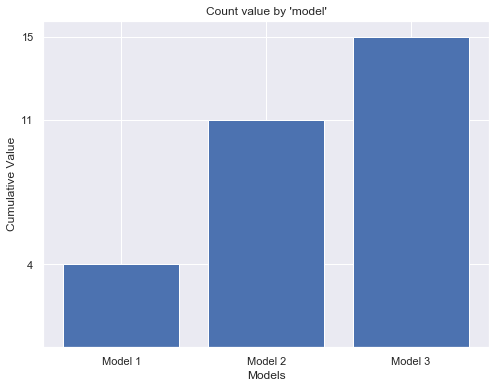

In [75]:
y = model_anal_data.values()
x = np.arange(len(y))
x_labels = ["Model 1", "Model 2", "Model 3"]


plt.figure(figsize=(8, 6))
plt.title("Count value by 'model'")
plt.bar(x, y)
plt.xticks(x, x_labels)
plt.yticks(sorted(y))
plt.xlabel("Models")
plt.ylabel("Cumulative Value")

plt.show()

#### Figure 1  
 It can be seen that the frequency of getting the high accuracy increases from 'Model_1' to 'Model_3'. In this case, the number of hidden layers is 2, all the same. Therefore, this graph supports the above claim that the higher the number of features, the higher the accuracy.


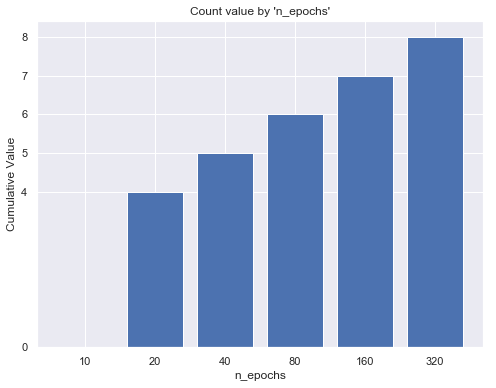

In [76]:
y = epoch_anal_data.values()
x = np.arange(len(y))
x_labels = ["10", "20", "40", "80", "160", "320"]


plt.figure(figsize=(8, 6))
plt.title("Count value by 'n_epochs'")
plt.bar(x, y)
plt.xticks(x, x_labels)
plt.yticks(sorted(y))
plt.xlabel("n_epochs")
plt.ylabel("Cumulative Value")

plt.show()

#### Figure 2
 According to the graph above, the higher the number of epochs, the higher the accuracy. This is a natural result that was derived of training the same data several times.


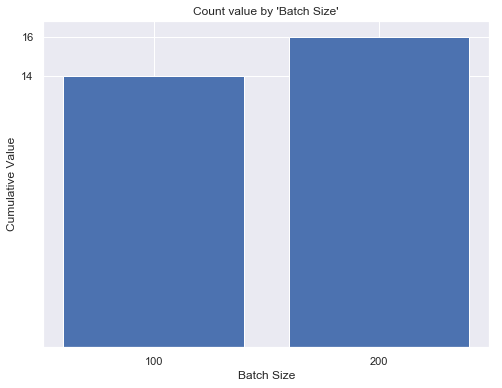

In [77]:
y = batch_size_anal_data.values()
x = np.arange(len(y))
x_labels = ["100", "200"]


plt.figure(figsize=(8, 6))
plt.title("Count value by 'Batch Size'")
plt.bar(x, y)
plt.xticks(x, x_labels)
plt.yticks(sorted(y))
plt.xlabel("Batch Size")
plt.ylabel("Cumulative Value")

plt.show()

#### Figure 3
 In the above graph, there are only two cases (Batch Size = 100 or 200). Therefore, it is hard to judge how it affects the training. At the derived graph, there seems that has no big correlation. In fact, since 'Batch Size' is a parameter for how much to train at once, it will affect the learning speed and the computer memory rather than accuracy.


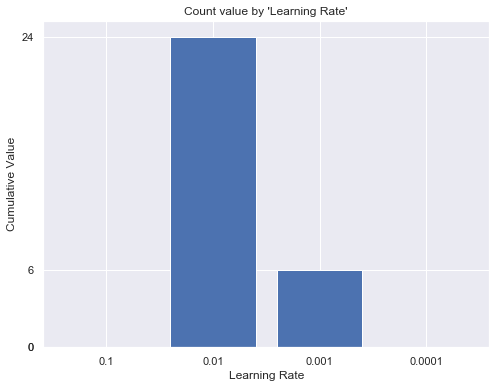

In [78]:
y = learning_rate_anal_data.values()
x = np.arange(len(y))
x_labels = ["0.1", "0.01", "0.001", "0.0001"]


plt.figure(figsize=(8, 6))
plt.title("Count value by 'Learning Rate'")
plt.bar(x, y)
plt.xticks(x, x_labels)
plt.yticks(sorted(y))
plt.xlabel("Learning Rate")
plt.ylabel("Cumulative Value")

plt.show()

#### Figure 4
 According to the derived graph above, 'Learning Rate' does not show any special correlation. Perhaps the difference in each interval is so large, so we can not guess the accuracy at the subdivided interval. Obviously, the more learning rate converges to 0.01, the higher accuracy we will get.


### Conclusion

- The number of features is proportional to the accuracy.
- The number of epochs is proportional to the accuracy.
- In MNIST data set, The more learning rate converges to 0.01, the higher accuracy it has.

### Best Model & Best Hyperparameters

#### Best 1
__(accuracy: 0.9837000095844268)__
- 'number of layers': 2
- 'hidden_layer_1_size' : 1024
- 'hidden_layer_2_size' : 784
- 'n_epochs': '160'
- 'batch_size': '100'
- 'learning_rate': '0.01'
  
#### Best 2
__(accuracy: 0.9833000099658966)__
- 'number of layers': 2
- 'hidden_layer_1_size' : 1024
- 'hidden_layer_2_size' : 784
- 'n_epochs': '320'
- 'batch_size': '200'
- 'learning_rate': '0.01'
  
#### Best 3
__(accuracy: 0.9831000089645385)__
- 'number of layers': 2
- 'hidden_layer_1_size' : 1024
- 'hidden_layer_2_size' : 784
- 'n_epochs': '320'
- 'batch_size': '100'
- 'learning_rate': '0.01'